# Multidimentional data - Matrices and Images

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg

In [2]:
plt.style.use('ggplot')
plt.rc('axes', grid=False)   # turn off the background grid for images

Let us work with the matrix:
$
\left[
\begin{array}{cc}
1 & 2 \\
1 & 1
\end{array}
\right]
$

In [3]:
M = np.array([[1,2],[1,1]])

M, M.shape

(array([[1, 2],
        [1, 1]]), (2, 2))

In [4]:
N = np.transpose(M)

N, N.shape

(array([[1, 1],
        [2, 1]]), (2, 2))

In [5]:
IM = linalg.inv(M)

IM

array([[-1.,  2.],
       [ 1., -1.]])

### numpy matrix multiply uses the `dot()` function:

In [6]:
IM.dot(M)

array([[ 1.,  0.],
       [ 0.,  1.]])

### Caution the `*` will just multiply the matricies on an element-by-element basis:

In [7]:
IM * M

array([[-1.,  4.],
       [ 1., -1.]])

### Solving system of linear equations

$$
\begin{array}{c}
x + 2y = 4 \\
x + y = 3 \\
\end{array}
\hspace{2cm}
\left[
\begin{array}{cc}
1 & 2 \\
1 & 1 \\
\end{array}
\right]
\left[
\begin{array}{c}
x\\
y
\end{array}
\right]
=
\left[
\begin{array}{c}
4\\
3\\ 
\end{array}
\right]
\hspace{2cm}
{\bf A}x = {\bf b}
\hspace{2cm}
\left[
\begin{array}{c}
x\\
y
\end{array}
\right]
=
\left[
\begin{array}{cc}
1 & 2 \\
1 & 1 \\
\end{array}
\right]^{-1}
\left[
\begin{array}{c}
4\\
3\\ 
\end{array}
\right]
=
\left[
\begin{array}{c}
2\\
1
\end{array}
\right]
$$

In [8]:
A = np.array([[1,2],[1,1]])

A, A.shape

(array([[1, 2],
        [1, 1]]), (2, 2))

In [9]:
b = np.array([[4],[3]])

b, b.shape

(array([[4],
        [3]]), (2, 1))

In [10]:
# Solve by inverting A and then mulitply by b

linalg.inv(A).dot(b) 

array([[ 2.],
       [ 1.]])

In [11]:
# Cleaner looking

linalg.solve(A,b)

array([[ 2.],
       [ 1.]])

### System of 3 equations example (Numpy):

$$
\begin{array}{c}
x + 3y + 5z = 10 \\
2x + 5y + z = 8 \\
2x + 3y + 8z = 3 \\
\end{array}
\hspace{3cm}
\left[
\begin{array}{ccc}
1 & 3 & 5 \\
2 & 5 & 1 \\
2 & 3 & 8 
\end{array}
\right]
\left[
\begin{array}{c}
x\\
y\\
z 
\end{array}
\right]
=
\left[
\begin{array}{c}
10\\
8\\
3 
\end{array}
\right]
$$

In [12]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
b = np.array([[10],[8],[3]])

print(linalg.inv(A))

print(linalg.solve(A,b))

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]
[[-9.28]
 [ 5.16]
 [ 0.76]]


### System of 3 equations example (SymPy) - Python's Symbolic Math Package

In [13]:
import sympy as sym

AA = sym.Matrix([[1,3,5],[2,5,1],[2,3,8]])
bb = sym.Matrix([[10],[8],[3]])

print(AA**-1)

print(AA**-1 * bb)

Matrix([[-37/25, 9/25, 22/25], [14/25, 2/25, -9/25], [4/25, -3/25, 1/25]])
Matrix([[-232/25], [129/25], [19/25]])


### SymPy is slower than NumPy

In [14]:
%timeit AA**-1 * bb
%timeit linalg.solve(A,b)

100 loops, best of 3: 2.28 ms per loop
10000 loops, best of 3: 58.3 µs per loop


# Images are just 2-d arrays - `imshow` will display 2-d arrays as images

[[1 3 5]
 [2 5 1]
 [2 3 8]]


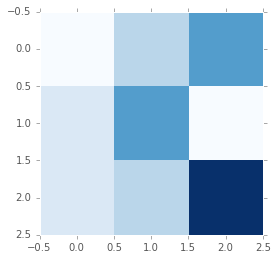

In [15]:
print(A)

plt.imshow(A, interpolation='nearest', cmap=plt.cm.Blues);

### Create some data

In [17]:
np.random.seed(42)
I = np.random.triangular(-3, 0, 8, (512,256))     # Create a 512x256 array of data in a Triangular distribution
                                                  # Think of this as a 2-d array of height = 512, width = 256

In [18]:
I.ndim, I.shape, I.dtype

(2, (512, 256), dtype('float64'))

In [19]:
print("The minimum value of the array I is {0:.2f}".format(I.min()))
print("The maximum value of the array I is {0:.2f}".format(I.max()))
print("The mean value of the array I is {0:.2f}".format(I.mean()))
print("The standard deviation of the array I is {0:.2f}".format(I.std()))

The minimum value of the array I is -2.99
The maximum value of the array I is 7.97
The mean value of the array I is 1.66
The standard deviation of the array I is 2.32


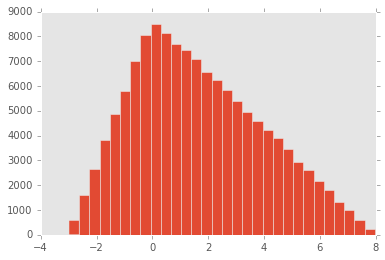

In [20]:
#flatten collapses n-dimentional data into 1-d

plt.hist(I.flatten(),bins=30); #2 dim to 1 dim using flatten

### Math on images applies to every value (pixel)

In [21]:
II = I + 8

print("The minimum value of the array II is {0:.2f}".format(II.min()))
print("The maximum value of the array II is {0:.2f}".format(II.max()))
print("The mean value of the array II is {0:.2f}".format(II.mean()))
print("The standard deviation of the array II is {0:.2f}".format(II.std()))

The minimum value of the array II is 5.01
The maximum value of the array II is 15.97
The mean value of the array II is 9.66
The standard deviation of the array II is 2.32


### Show the image represenation of `I` with a colorbar

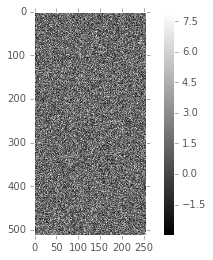

In [22]:
plt.imshow(I, cmap=plt.cm.gray)
plt.colorbar();

### Colormap reference: http://matplotlib.org/examples/color/colormaps_reference.html

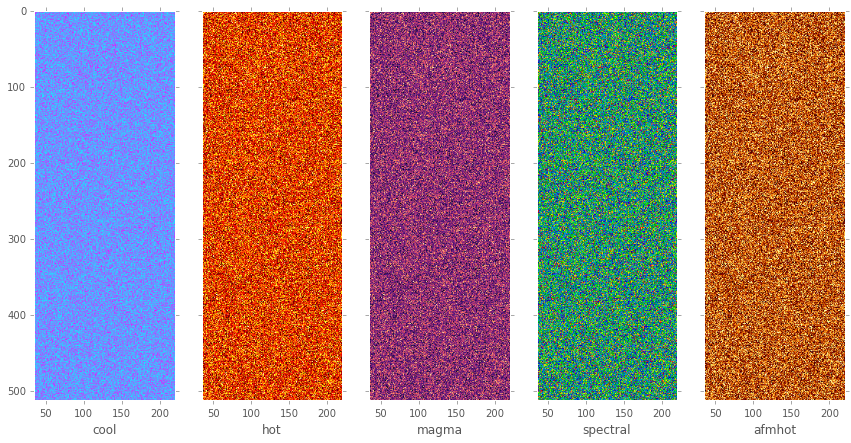

In [25]:
fig, ax = plt.subplots(1,5,sharey=True) #never use jet color map

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(I, cmap=plt.cm.cool)
ax[0].set_xlabel('cool')

ax[1].imshow(I, cmap=plt.cm.hot)
ax[1].set_xlabel('hot')

ax[2].imshow(I, cmap=plt.cm.magma)
ax[2].set_xlabel('magma')

ax[3].imshow(I, cmap=plt.cm.spectral)
ax[3].set_xlabel('spectral')

ax[4].imshow(I, cmap=plt.cm.afmhot)
ax[4].set_xlabel('afmhot')

## WARNING! Common image formats DO NOT preserve dynamic range of original data!!
- Common image formates are **NOT** suitable for scientific data!

In [26]:
plt.imsave('TrangleNoise.png', I, cmap=plt.cm.gray)     # Write the array I to a PNG file

Ipng = plt.imread('TrangleNoise.png')                   # Read in the PNG file

print("The original data has a min = {0:.2f} and a max = {1:.2f}".format(I.min(), I.max()))

print("The PNG file has a min = {0:.2f} and a max = {1:.2f}".format(Ipng.min(), Ipng.max())) #dont save data as common images

The original data has a min = -2.99 and a max = 7.97
The PNG file has a min = 0.00 and a max = 1.00


## Creating images from math

In [27]:
X = np.linspace(-5, 5, 500)
Y = np.linspace(-5, 5, 500)

X, Y = np.meshgrid(X, Y)     # turns two 1-d arrays (X, Y) into one 2-d grid

Z = np.sqrt(X**2+Y**2)+np.sin(X**2+Y**2)

Z.min(), Z.max(), Z.mean()

(0.01437127898195149, 7.7517598030425772, 3.859731523283386)

### Fancy Image Display

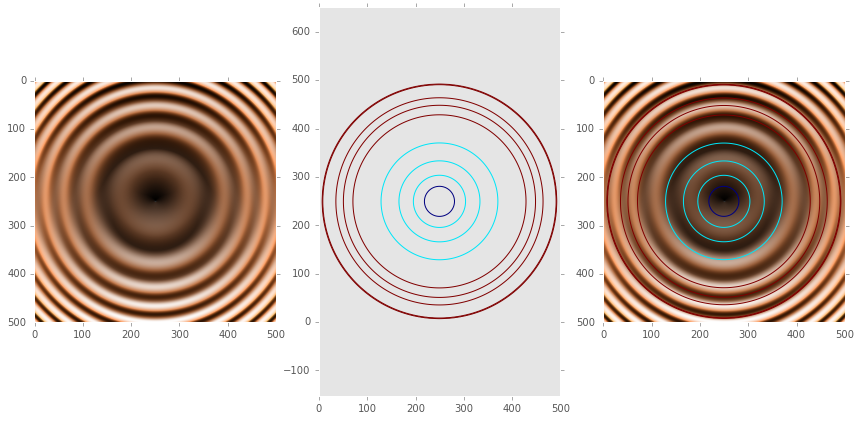

In [28]:
from matplotlib.colors import LightSource

ls = LightSource(azdeg=0,altdeg=40)
shadedfig = ls.shade(Z,plt.cm.copper)

fig, ax = plt.subplots(1,3)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(shadedfig)

contlevels = [1,2,Z.mean()]

ax[1].axis('equal')
ax[1].contour(Z,contlevels)

ax[2].imshow(shadedfig)
ax[2].contour(Z,contlevels);

### Reading in images - Common Formats

In [29]:
I2 = plt.imread('doctor5.png')

print("The image I2 has a shape [height,width] of {0}".format(I2.shape))
print("The image I2 is made up of data of type {0}".format(I2.dtype))
print("The image I2 has a maximum value of {0}".format(I2.max()))
print("The image I2 has a minimum value of {0}".format(I2.min()))

The image I2 has a shape [height,width] of (618, 194)
The image I2 is made up of data of type float32
The image I2 has a maximum value of 1.0
The image I2 has a minimum value of 0.003921568859368563


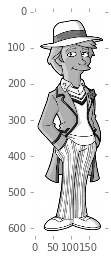

In [30]:
plt.imshow(I2,cmap=plt.cm.gray);

## Images are just arrays that can be sliced. 

- ### For common image formats the origin is the upper left hand corner

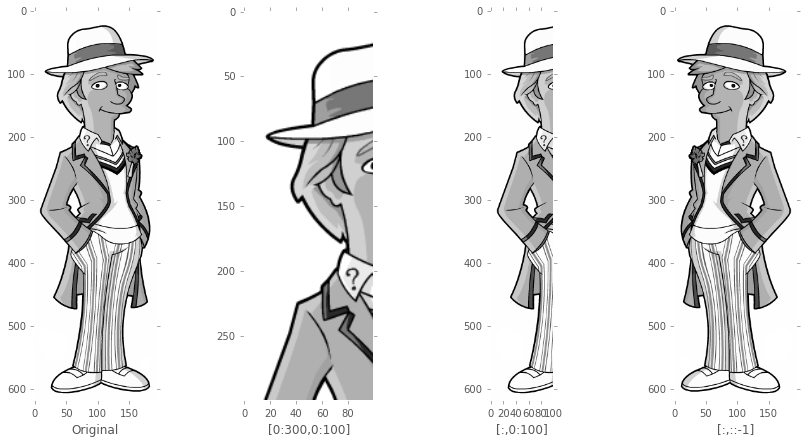

In [31]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(12,6)

fig.tight_layout()

# You can show just slices of the image - Rememeber: The origin is the upper left corner

ax[0].imshow(I2, cmap=plt.cm.gray)
ax[0].set_xlabel('Original')

ax[1].imshow(I2[0:300,0:100], cmap=plt.cm.gray)
ax[1].set_xlabel('[0:300,0:100]')                 # 300 rows, 100 columns

ax[2].imshow(I2[:,0:100], cmap=plt.cm.gray)       # ":" = whole range
ax[2].set_xlabel('[:,0:100]')                     # all rows, 100 columns

ax[3].imshow(I2[:,::-1], cmap=plt.cm.gray);
ax[3].set_xlabel('[:,::-1]')                      # reverse the columns

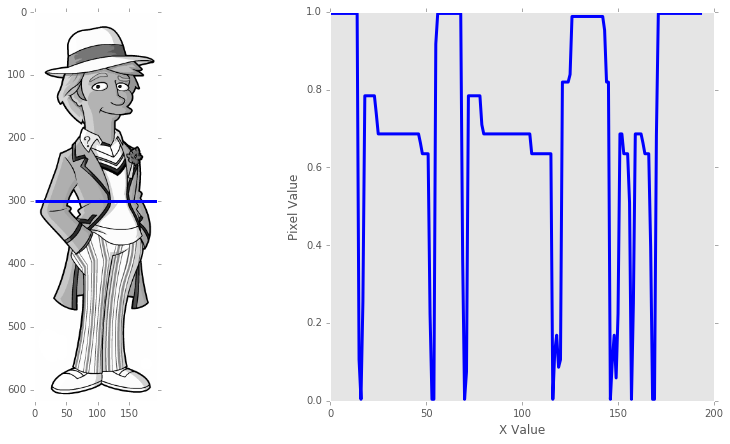

In [32]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)

fig.tight_layout()

CutLine = 300

ax[0].imshow(I2, cmap=plt.cm.gray)
ax[0].hlines(CutLine, 0, 194, color='b', linewidth=3)

ax[1].plot(I2[CutLine,:], color='b', linewidth=3)
ax[1].set_xlabel("X Value")
ax[1].set_ylabel("Pixel Value")

## Simple image manipulation

In [33]:
from scipy import ndimage

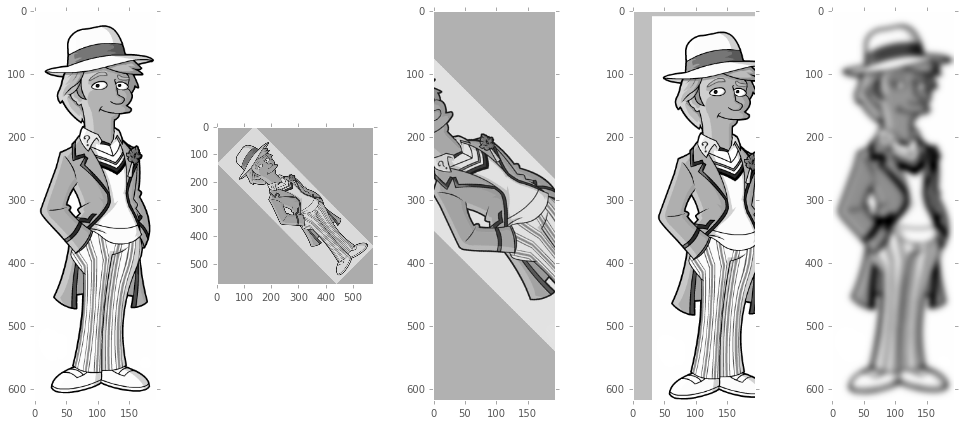

In [34]:
fig, ax = plt.subplots(1,5)
fig.set_size_inches(14,6)

fig.tight_layout()

ax[0].imshow(I2, cmap=plt.cm.gray)

I3 = ndimage.rotate(I2,45,cval=0.75)               # cval is the value to set pixels outside of image
ax[1].imshow(I3, cmap=plt.cm.gray)                 # Rotate and reshape

I4 = ndimage.rotate(I2,45,reshape=False,cval=0.75) # Rotate and do not reshape
ax[2].imshow(I4, cmap=plt.cm.gray)

I5 = ndimage.shift(I2,(10,30),cval=0.75)           # Shift image      
ax[3].imshow(I5, cmap=plt.cm.gray)

I6 = ndimage.gaussian_filter(I2,5)                # Blur image
ax[4].imshow(I6, cmap=plt.cm.gray);

### `ndimage` can do much more: http://scipy-lectures.github.io/advanced/image_processing/

---

## FITS file (Flexible Image Transport System) - Standard Astro File Format
- **FITS format preserves dynamic range of data**
- FITS format can include lists, tables, images, and combunations of different types of data

In [35]:
import astropy.io.fits as fits

In [36]:
x = fits.open('bsg01.fits')

x.info()

Filename: bsg01.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (665, 1000)   float32   


In [37]:
x[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  665                                                  
NAXIS2  =                 1000                                                  
EXTEND  =                    T                                                  

In [38]:
xd = x[0].data

print("The image x has a shape [height,width] of {0}".format(xd.shape))
print("The image x is made up of data of type {0}".format(xd.dtype))
print("The image x has a maximum value of {0}".format(xd.max()))
print("The image x has a minimum value of {0}".format(xd.min()))

The image x has a shape [height,width] of (1000, 665)
The image x is made up of data of type >f4
The image x has a maximum value of 101.0
The image x has a minimum value of 0.03921568766236305


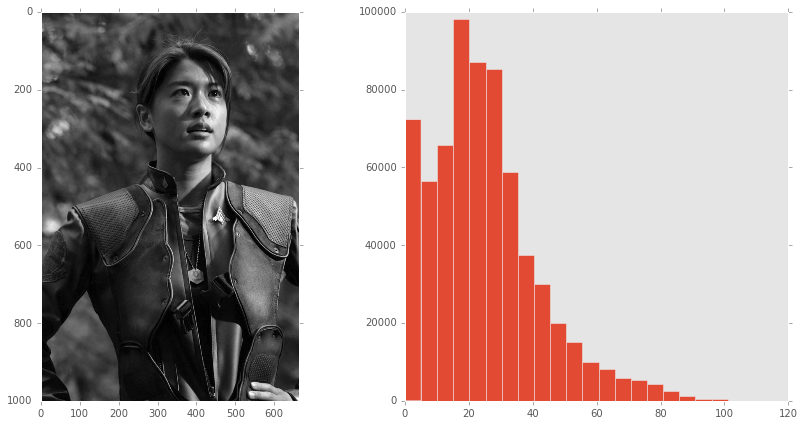

In [39]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(xd,cmap=plt.cm.gray)

ax[1].hist(xd.flatten(),bins=20);

## You can use masks on images

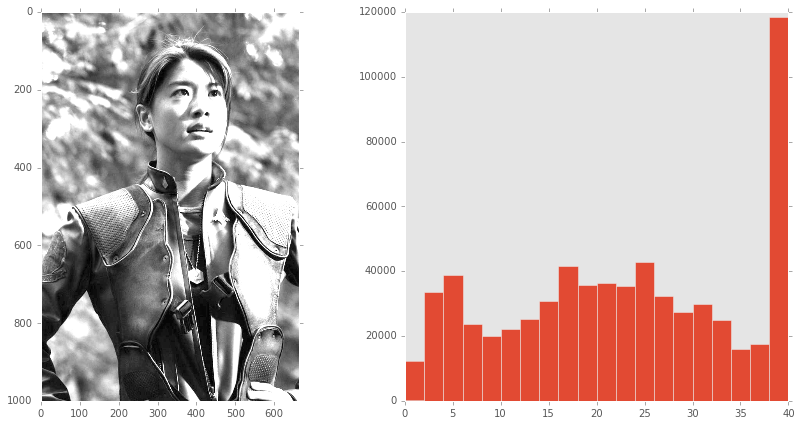

In [40]:
CopyData = np.copy(xd)

CutOff = 40

mask = np.where(CopyData > CutOff)
CopyData[mask] = CutOff                 # You can not just throw data away, you have to set it to something.

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(CopyData,cmap=plt.cm.gray)

ax[1].hist(CopyData.flatten(),bins=20);

## You can add and subtract images

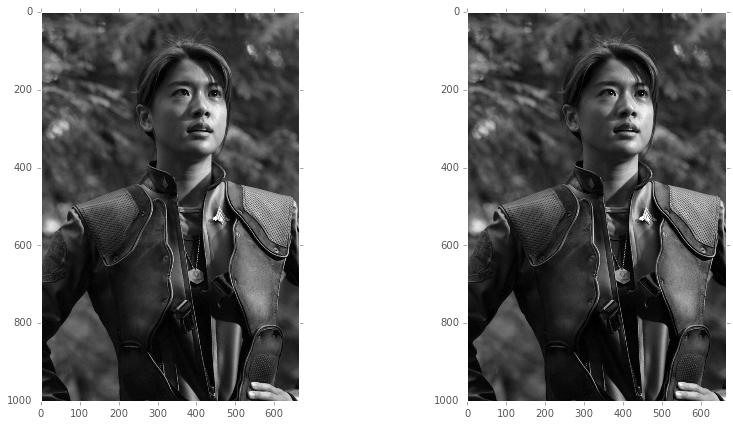

In [41]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(xd, cmap=plt.cm.gray)

# Open another file 'bsg02.fits'

y = fits.open('bsg02.fits')
yd = y[0].data

ax[1].imshow(yd, cmap=plt.cm.gray);

### The two images above may look the same but they are not! Subtracting the two images reveals the truth.

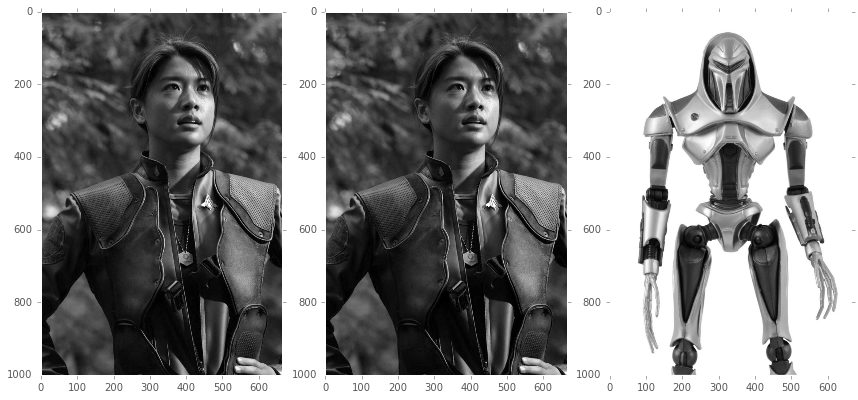

In [42]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].imshow(xd, cmap=plt.cm.gray)
ax[1].imshow(yd, cmap=plt.cm.gray)

z = xd - yd                          # Subtract the images pixel by pixel

ax[2].imshow(z, cmap=plt.cm.gray);

## FITS Tables - An astronomical example

* Stellar spectra data from the [ESO Library of Stellar Spectra](http://www.eso.org/sci/facilities/paranal/decommissioned/isaac/tools/lib.html)

In [43]:
S = fits.open('SolarSpectra.fits')

S.info()

Filename: SolarSpectra.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      35   (4771,)      float32   


In [44]:
Data = S[0].data

In [45]:
Head = S[0].header
Head

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 4771 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
DATE    = '2000-02-16T18:16:26' / Date FITS file was generated                  
IRAF-TLM= '15:16:26 (16/02/2000)' / Time of last modification                   
APNUM1  = '1 1     '                                                            
WCSDIM  =                    1                                                  
CTYPE1  = 'LINEAR  '                                                            
CRVAL1  =                1150.                                                  
CRPIX1  =                   

In [47]:
# The FITS header has the information to make an array of wavelengths

Start = Head['CRVAL1']
Number = Head['NAXIS1']
Delta  = Head['CDELT1']

End = Start + (Number * Delta)

Wavelength = np.arange(Start,End,Delta)

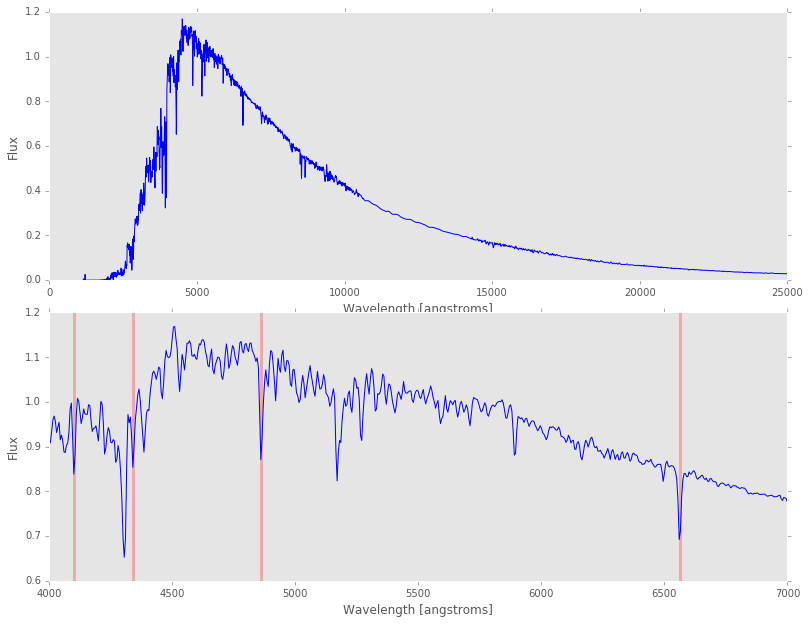

In [48]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

# Full spectra

ax[0].plot(Wavelength, Data, color='b')
ax[0].set_ylabel("Flux")
ax[0].set_xlabel("Wavelength [angstroms]")

# Just the visible range with the hydrogen Balmer lines

ax[1].set_xlim(4000,7000)
ax[1].set_ylim(0.6,1.2)
ax[1].plot(Wavelength, Data, color='b')
ax[1].set_ylabel("Flux")
ax[1].set_xlabel("Wavelength [angstroms]")

H_Balmer = [6563,4861,4341,4102,3970,3889,3835,3646]

ax[1].vlines(H_Balmer,0,2, color='r', linewidth=3, alpha = 0.25)

# Pseudocolor - All color astronomy images are fake.

### Color images are composed of three 2-d images: <img src="images/Layers.png" width="150">

### JPG images are 3-d, even grayscale images

In [49]:
redfilter = plt.imread('sphereR.jpg')

redfilter.shape,redfilter.dtype  #three images stacked ontop

((480, 640, 3), dtype('uint8'))

### We just want to read in one of the three channels

In [50]:
redfilter = plt.imread('sphereR.jpg')[:,:,0]

redfilter.shape,redfilter.dtype

((480, 640), dtype('uint8'))

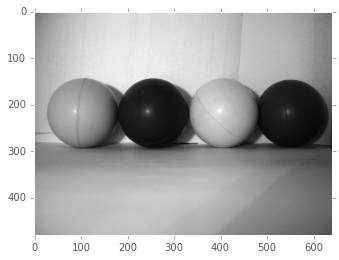

In [51]:
plt.imshow(redfilter,cmap=plt.cm.gray);

In [64]:
greenfilter = plt.imread('sphereG.jpg')[:,:,0]
bluefilter = plt.imread('sphereB.jpg')[:,:,0]

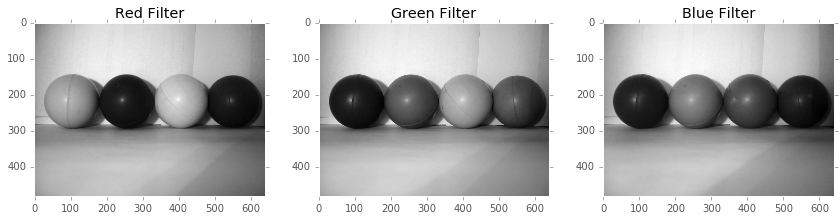

In [53]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,3)

fig.tight_layout()

ax[0].set_title("Red Filter")
ax[1].set_title("Green Filter")
ax[2].set_title("Blue Filter")

ax[0].imshow(redfilter,cmap=plt.cm.gray)
ax[1].imshow(greenfilter,cmap=plt.cm.gray)
ax[2].imshow(bluefilter,cmap=plt.cm.gray); #brighter has most blue, green, red

### Need to create a blank 3-d array to hold all of the images

(480, 640, 3) uint8


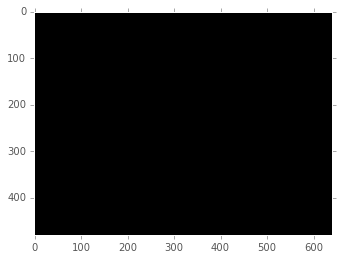

In [54]:
rgb = np.zeros((480,640,3),dtype='uint8')

print(rgb.shape, rgb.dtype)

plt.imshow(rgb,cmap=plt.cm.gray);

## Fill the array with the filtered images

In [55]:
rgb[:,:,0] = redfilter
rgb[:,:,1] = greenfilter
rgb[:,:,2] = bluefilter

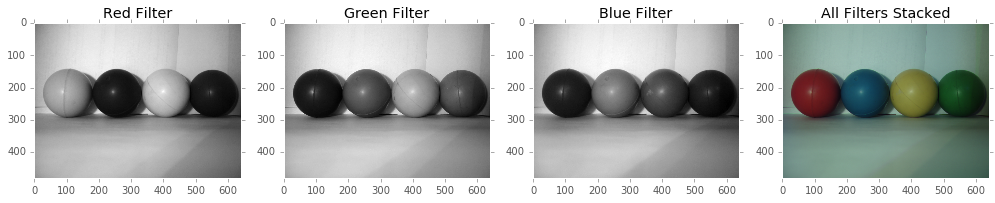

In [56]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(14,3)

fig.tight_layout()

ax[0].set_title("Red Filter")
ax[1].set_title("Green Filter")
ax[2].set_title("Blue Filter")
ax[3].set_title("All Filters Stacked")

ax[0].imshow(redfilter,cmap=plt.cm.gray)
ax[1].imshow(greenfilter,cmap=plt.cm.gray)
ax[2].imshow(bluefilter,cmap=plt.cm.gray)
ax[3].imshow(rgb,cmap=plt.cm.gray);

In [57]:
print("The image rgb has a shape [height,width] of {0}".format(rgb.shape))
print("The image rgb is made up of data of type {0}".format(rgb.dtype))
print("The image rgb has a maximum value of {0}".format(rgb.max()))
print("The image rgb has a minimum value of {0}".format(rgb.min()))

The image rgb has a shape [height,width] of (480, 640, 3)
The image rgb is made up of data of type uint8
The image rgb has a maximum value of 195
The image rgb has a minimum value of 4


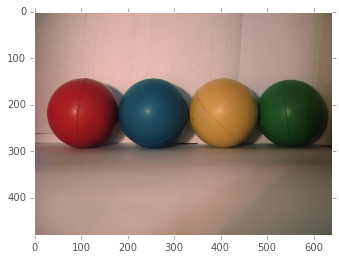

In [63]:
rgb[:,:,0] = redfilter * 1.5

plt.imshow(rgb)